In [30]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime
import statistics
import pandas as pd
import numpy as np

#%matplotlib notebook

In [31]:
time_between_interactions = 20 #the mininmum number of seconds between separate interactions

In [32]:
pairs_interactions = {} #key is student tuple, value is a list of list of start and end timestamps

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        t = int(t)
        id1 = int(id1); id2 = int(id2);
        
        #ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
        students = (min(id1, id2), max(id1, id2))
        
        if students in pairs_interactions:
            duration = t - pairs_interactions[students][-1][1]
            if duration <= time_between_interactions:
                pairs_interactions[students][-1][1] = t
            else:
                pairs_interactions[students].append([t - 20, t])
        else:
            pairs_interactions[students] = [[t - 20, t]]


^^ Setting up the data

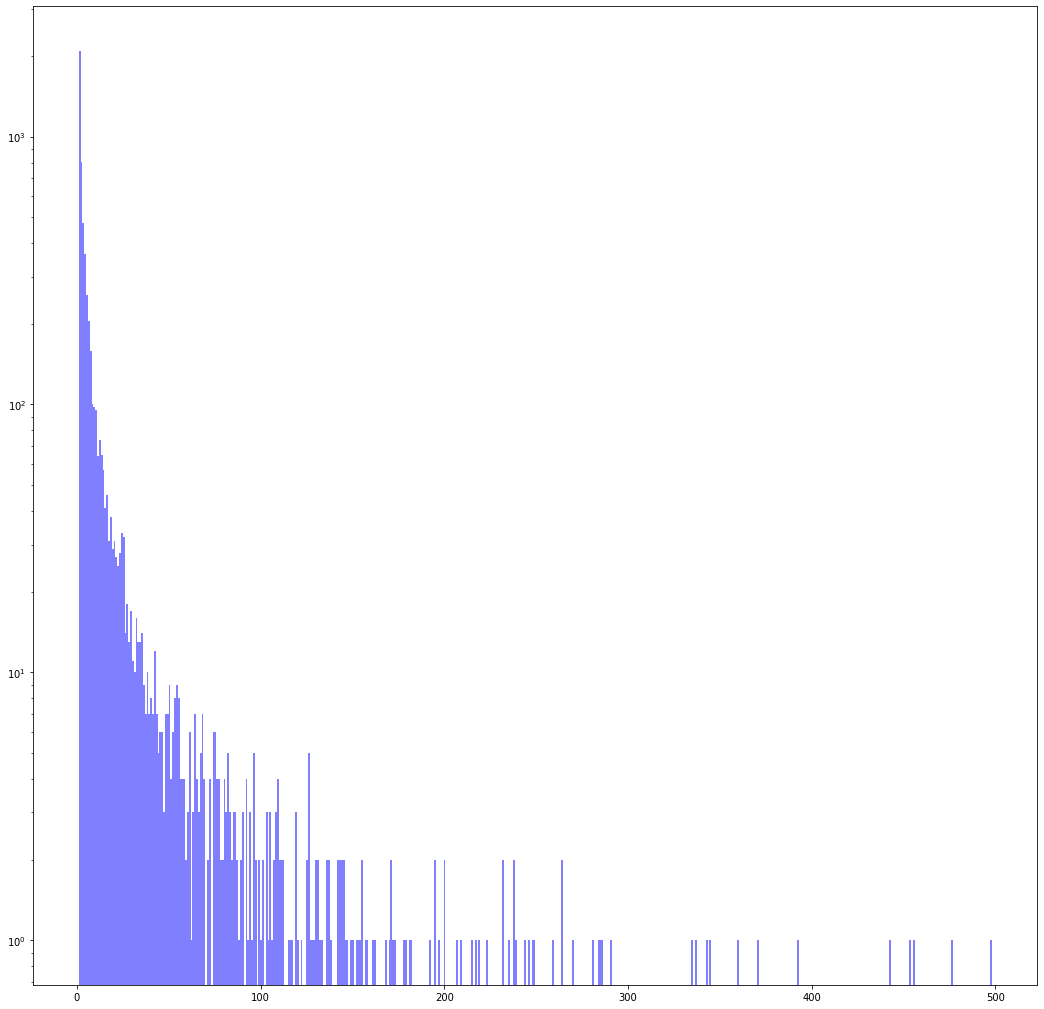

In [33]:
x1 = list(pairs_interactions.values())
x1 = [len(i) for i in x1]
num_bins1 = max(x1)

figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x1, num_bins1, facecolor='blue', alpha=0.5, log=True)
plt.show()

^^ Histogram of the number of interactions per pair

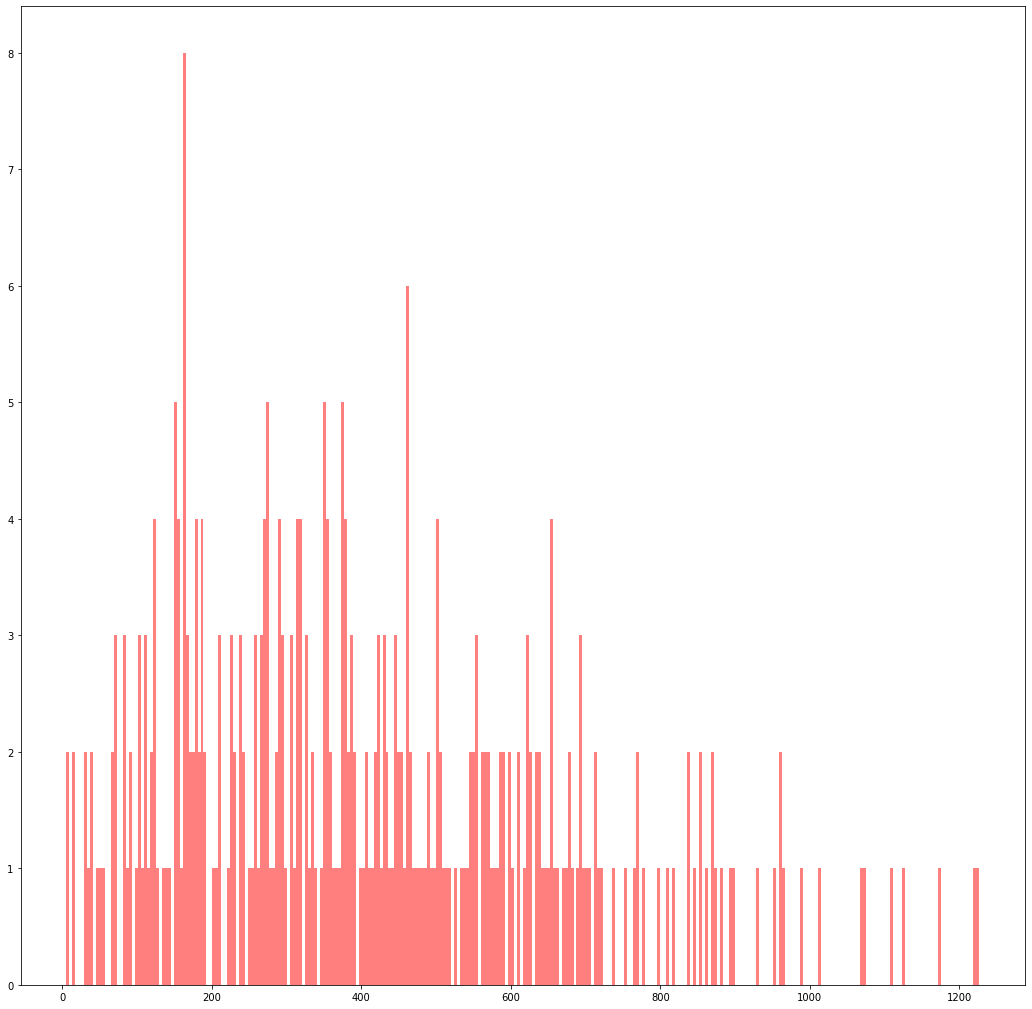

In [34]:
person_interactions = {} #key is student, value is total number of interactions they had with anyone
for pair in pairs_interactions:
    interactions = len(pairs_interactions[pair])
    for person in pair:
        if person in person_interactions:
            person_interactions[person] += interactions
        else:
            person_interactions[person] = interactions
            
x2 = list(person_interactions.values())
num_bins2 = int(max(x2) * .25)
figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x2, num_bins2, facecolor='red', alpha=0.5)
plt.show()

^^ Histogram of the number of interactions per one person.  x is interactions, y is number of people

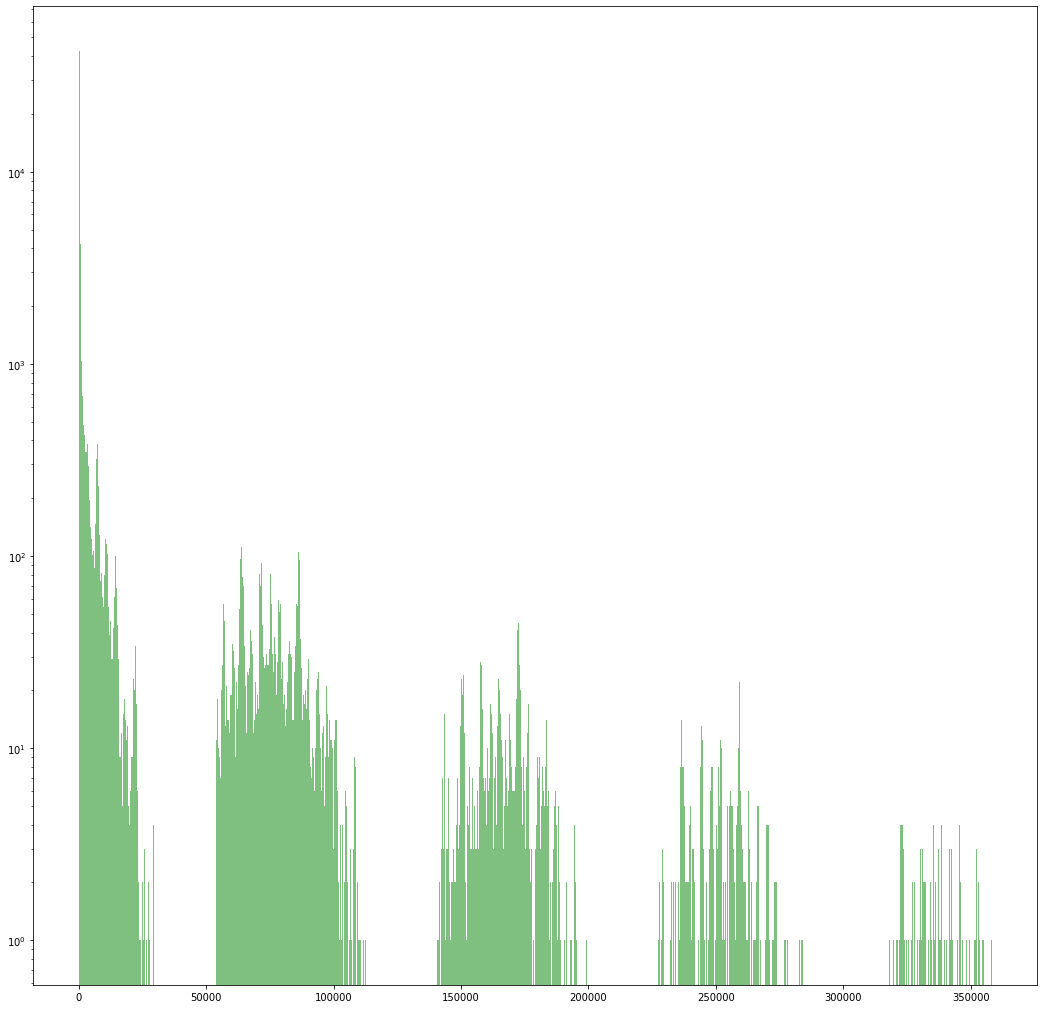

In [35]:
x3 = []

for interactions in pairs_interactions.values(): #interactions is a list of lists of start and end times
    for i in range(1, len(interactions)): #skipping the first interaction
        time = interactions[i][0] - interactions[i - 1][-1]
        if time > 0:
            x3.append(time)

num_bins3 = 1000
figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x3, num_bins3, facecolor='green', alpha=0.5, log=True)
plt.show()

^^ Histogram of how many seconds there are between interactions between people are based on the pairs_interactions dictionary